# Statistical Models

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from darts import TimeSeries
from helpers import *
sns.set_theme(context="notebook", style="whitegrid", color_codes=True, rc={"figure.figsize": (6, 2)})

### Get Data

<Axes: xlabel='datetime'>

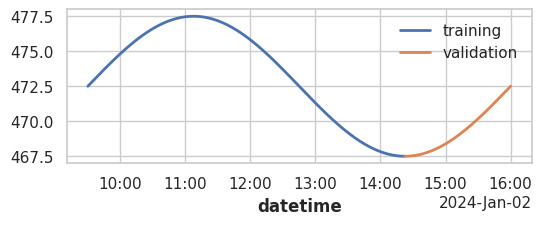

In [2]:
df = create_sinewave()
series = TimeSeries.from_dataframe(df, value_cols='close')
# series.plot()

train, val = series.split_after(0.75)
train.plot(label="training")
val.plot(label="validation")

### Statistical forecasting

In [3]:
from darts.metrics import mape
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, module="statsmodels")

def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print(f"model {model} obtains MAPE: {mape(val, forecast):.2f}%")

eval_model(ExponentialSmoothing(seasonal_periods=60)) # StatsModels chokes on S interval, so provide seasonal_periods
eval_model(TBATS())
eval_model(AutoARIMA())
eval_model(Theta())

model ExponentialSmoothing(seasonal_periods=60) obtains MAPE: 0.40%


/usr/local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/usr/local/lib/python3.10/site-packages/stats

model TBATS() obtains MAPE: 0.39%
model AutoARIMA() obtains MAPE: 0.39%
model Theta() obtains MAPE: 0.55%


### Hyper-parameter optimization example

In [5]:
# Search for the best theta parameter, by trying 50 different values
thetas = 2 - np.linspace(-10, 10, 50)
best_mape = float("inf")
best_theta = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print(f"Lowest MAPE is: {mape(val, pred_best_theta):.2f}, with theta = {best_theta}.")

Lowest MAPE is: 0.17, with theta = 0.5714285714285712.


---
### Backtesting
* Copy from Darts Quickstart